<a href="https://colab.research.google.com/github/teidenzero/GAN/blob/master/1D_discriminator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model
from matplotlib import pyplot
from numpy.random import rand
from numpy import hstack
import numpy

In [0]:
def define_discriminator(n_inputs=2):
  model = Sequential()
  model.add(Dense(25, activation = 'relu', kernel_initializer='he_uniform', input_dim=n_inputs))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 25)                75        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 26        
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


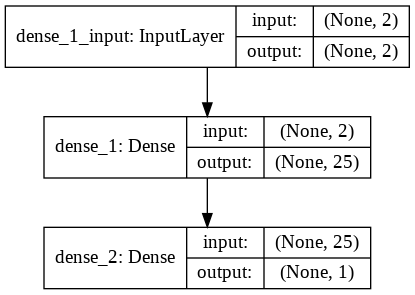

In [4]:
model = define_discriminator()
model.summary()
plot_model(model, to_file='discriminator_plot.png', show_shapes=True, show_layer_names=True)

In [0]:
# generate n real samples with class labels
def generate_real_samples(n):
  # generate inputs in [-0.5, 0.5]
  X1 = rand(n) - 0.5
  # generate outputs X^2
  X2 = X1 * X1
  # stack arrays
  X1 = X1.reshape(n, 1)
  X2 = X2.reshape(n, 1)
  X = hstack((X1, X2))
  # generate class labels
  y = numpy.ones((n, 1))
  return X, y

In [0]:
# generate n fake samples with class labels
def generate_fake_samples(n):
  # generate inputs in [-1, 1]
  X1 = -1 + rand(n) * 2
  
  
  # generate outputs in [-1, 1]
  X2 = -1 + rand(n) * 2
  
  # stack arrays
  X1 = X1.reshape(n, 1)
  X2 = X2.reshape(n, 1)
  X = hstack((X1, X2))

  # generate class labels
  y = numpy.zeros((n, 1))
 
  return X, y

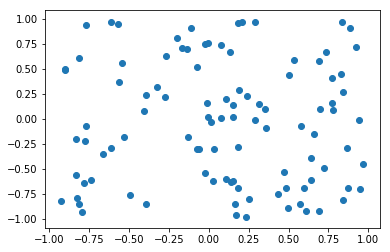

(array([[ 0.07505308,  0.01062896],
        [-0.82653526, -0.78926277],
        [-0.39169363,  0.24530966],
        [ 0.2358609 , -0.97416854],
        [-0.2682745 ,  0.63225362],
        [ 0.15015381,  0.14184247],
        [-0.83469703, -0.20419583],
        [-0.07177654,  0.51872111],
        [-0.40650209,  0.08337492],
        [ 0.57339214, -0.85150652],
        [-0.00346637,  0.7591988 ],
        [ 0.63827008, -0.60652871],
        [-0.6108694 , -0.28790009],
        [-0.66216407, -0.35100752],
        [ 0.10623465, -0.60171033],
        [ 0.77529222,  0.41202787],
        [ 0.1307867 ,  0.66783708],
        [ 0.07793962,  0.74211922],
        [ 0.69110977, -0.91746075],
        [-0.00360741,  0.01636717],
        [-0.01136548,  0.16496703],
        [ 0.43344345, -0.75302799],
        [ 0.3522579 ,  0.09699207],
        [-0.54217803,  0.556272  ],
        [-0.81488407,  0.61500856],
        [ 0.29221084, -0.01132456],
        [-0.49766717, -0.75671358],
        [-0.11111835,  0.908

In [27]:
generate_fake_samples(100)


In [0]:
# train the discriminator model
def train_discriminator(model, n_epochs=1000, n_batch=128):
  half_batch = int(n_batch / 2)
  # run epochs manually
  for i in range(n_epochs):
    # generate real examples
    X_real, y_real = generate_real_samples(half_batch)
    #update model
    model.train_on_batch(X_real, y_real)
    #generate fake examples
    X_fake, y_fake = generate_fake_samples(half_batch)
    #update model
    model.train_on_batch(X_fake, y_fake)
    
    #evaluate
    _, acc_real = model.evaluate(X_real, y_real, verbose=0)
    _, acc_fake = model.evaluate(X_fake, y_fake, verbose=0)
    print(i, acc_real, acc_fake)
   



In [0]:
model = define_discriminator()
train_discriminator(model)

In [0]:
# define the standalone generator model
def define_generator(latent_dim, n_outputs=2):
  model = Sequential()
  #print('this is happening')
  model.add(Dense(15, activation='relu', kernel_initializer='he_uniform',
  input_dim=latent_dim))
  model.add(Dense(n_outputs, activation='linear'))
  # define the discriminator model
  return model

model = define_generator(5)
#print(model)
#summarize the model

model.summary()
# plot the model
plot_model(model, to_file='generator_plot.png', show_shapes=True, show_layer_names=True)

In [0]:
# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n):
  # generate points in the latent space
  x_input = randn(latent_dim * n)
  # reshape into a batch of inputs for the network
  x_input = x_input.reshape(n, latent_dim)
  return x_input

In [0]:
# use the generator to generate n fake examples and plot the results
def generate_fake_samples(generator, latent_dim, n):
  # generate points in latent space
  x_input = generate_latent_points(latent_dim, n)
  # predict outputs
  X = generator.predict(x_input)
  # plot the results
  pyplot.scatter(X[:, 0], X[:, 1])
  pyplot.show()

In [0]:
latent_dim = 5
model = define_generator(latent_dim)